In [9]:
import pandas as pd

input = pd.read_csv("input_output/input.csv", index_col=0)
label = pd.read_csv("input_output/output.csv", index_col=0)

INPUT_TYPE = ["dc_5", "nc_3", "nc_5", "nc_10", "nc_25", "nc_30", "nc_50", "nc_75"]
OUTPUT_TYPE = [
    "umato_srho_0",
    "pca_tnc_25",
    "tsne_pr_0",
    "umato_tnc_25",
    "isomap_tnc_25",
    "lle_pr_0",
    "isomap_pr_0",
    "tsne_tnc_25",
    "umap_pr_0",
    "umap_tnc_25",
    "pca_pr_0",
    "lle_tnc_25",
    "umato_pr_0",
]
SCORE_TYPE = [
    "explained_variance_score",
    "max_error",
    "mean_absolute_error",
    "mean_squared_error",
    "root_mean_squared_error",
    "mean_squared_log_error",
    "root_mean_squared_log_error",
    "median_absolute_error",
    "r2_score",
    "mean_poisson_deviance",
    "mean_gamma_deviance",
    "mean_absolute_percentage_error",
    "d2_absolute_error_score",
    "d2_pinball_score",
    "d2_tweedie_score",
]
reg = None

In [23]:
import autosklearn.regression
import joblib
import sklearn

# Regression with All Inputs
for t in OUTPUT_TYPE:
    X = input
    y = label[t]

    reg = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=600,
        per_run_time_limit=30,
        memory_limit=10000,
        resampling_strategy="cv",
        resampling_strategy_arguments={"folds": 5},
    )
    reg.fit(X, y)

    save_path = f"pretrained_model/{t}.pkl"
    joblib.dump(reg, save_path)
    print(reg.leaderboard())

    pred = reg.predict(X)
    print(f"{t} - R2:", sklearn.metrics.r2_score(y, pred))

          rank  ensemble_weight               type      cost  duration
model_id                                                              
74           1             0.16     ard_regression  0.743120  3.066564
83           2             0.26     ard_regression  0.748925  3.498580
19           3             0.30   gaussian_process  0.788258  3.004515
24           4             0.18         libsvm_svr  0.826112  3.245982
23           5             0.10  gradient_boosting  0.868874  4.937066
umato_srho_0 - R2: 0.715458163127411
          rank  ensemble_weight           type      cost  duration
model_id                                                          
44           1             0.44  liblinear_svr  0.228526  3.135366
52           2             0.02            sgd  0.298811  3.245730
47           3             0.04  decision_tree  0.351286  3.087181
30           4             0.02     libsvm_svr  0.456421  2.516483
62           5             0.04     libsvm_svr  0.484653  4.0081

In [8]:
import joblib
import sklearn

t = "umato_srho_0"
X = input
y = label[t]

reg = joblib.load(f"pretrained_model/{t}.pkl")

pred = reg.predict(X)
print(sklearn.metrics.r2_score(y, pred))

KeyboardInterrupt: 

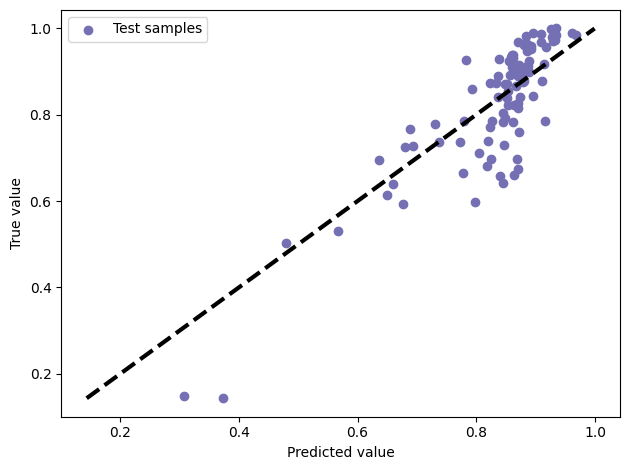

In [7]:
import matplotlib.pyplot as plt

plt.scatter(pred, y, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=3)
plt.legend()
plt.tight_layout()
plt.show()

umap_pr_0 - R2: 0.8245397460587571


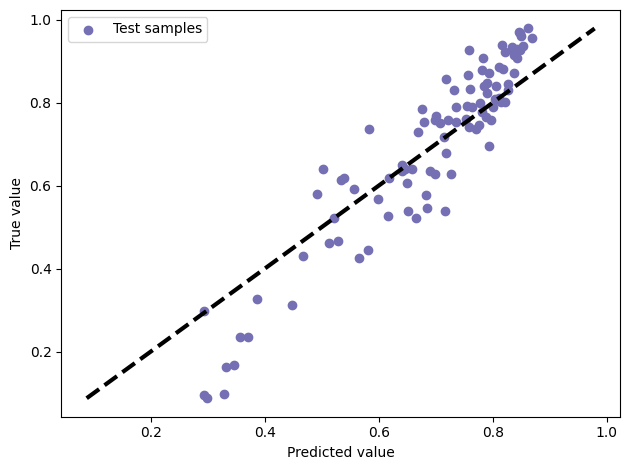

In [7]:
import joblib
import matplotlib.pyplot as plt
import sklearn

t = "umap_pr_0"
X = input
y = label[t]

reg = joblib.load(f"pretrained_model/{t}.pkl")

pred = reg.predict(X)
print(f"{t} - R2:", sklearn.metrics.r2_score(y, pred))

plt.scatter(pred, y, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=3)
plt.legend()
plt.tight_layout()
plt.show()

전부 다 넣었을 때 R2 저장
hyperparameter 예측하기


tsne_pr_0 - R2: 0.925711472051453


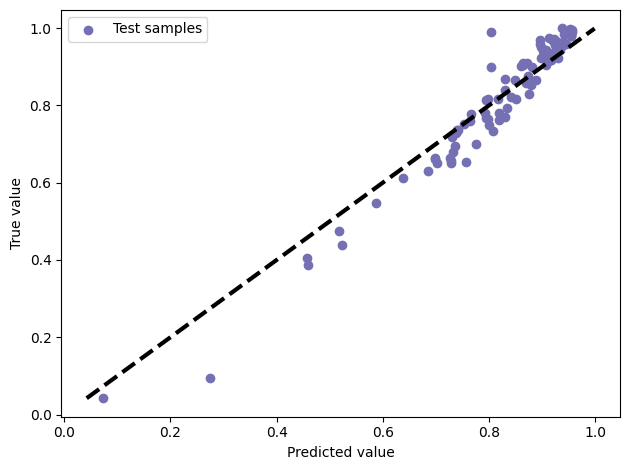

In [11]:
import joblib
import matplotlib.pyplot as plt
import sklearn

t = "tsne_pr_0"
X = input
y = label[t]

reg = joblib.load(f"pretrained_model/{t}.pkl")

pred = reg.predict(X)
print(f"{t} - R2:", sklearn.metrics.r2_score(y, pred))

plt.scatter(pred, y, label="Test samples", c="#7570b3")
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=3)
plt.legend()
plt.tight_layout()
plt.show()